In [1]:
import pandas as pd

In [3]:
data_HA = pd.read_excel("Data\Heart Attack.xlsx", sheet_name="Data")

In [4]:
list_var = ["sbp", "tobacco", "ldl", 'adiposity', "typea", "obesity", "alcohol", "age"]

In [7]:
import matplotlib.pyplot as plt

In [16]:
import seaborn as sns

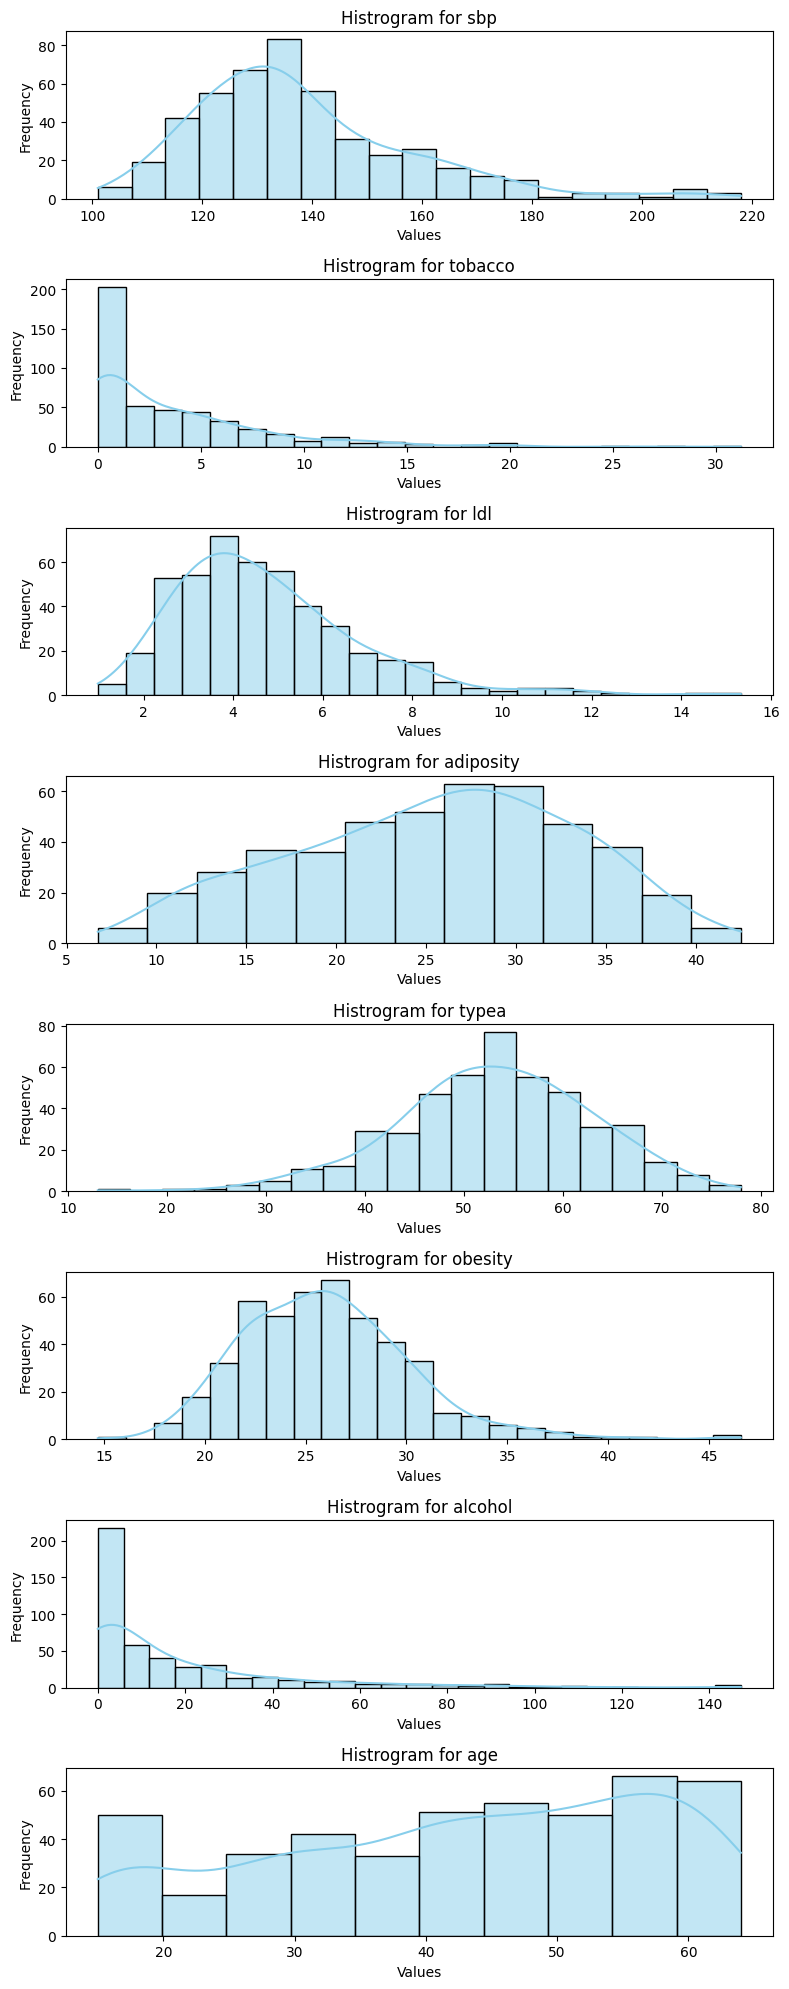

In [19]:
fig, axs = plt.subplots(8, 1, figsize=(8,20))
for i, var in enumerate(list_var):

    sns.histplot(data_HA[var], kde=True, color='skyblue', edgecolor='black', ax=axs[i])
    axs[i].set_xlabel("Values")
    axs[i].set_ylabel("Frequency")
    axs[i].set_title(f"Histrogram for {var}")
    
# Adjust layout
# Show plot
plt.tight_layout()
plt.show()





Note that some of the data is right skewed and some are left skewed. To fix this issue we need to either square, log or cube root the variable. if there are zero values sometimes you may need to add a very small positive value (cant take log of zero to fix it)
So lets give it a try 

In [21]:
import numpy as np

c:\Users\sshres07\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


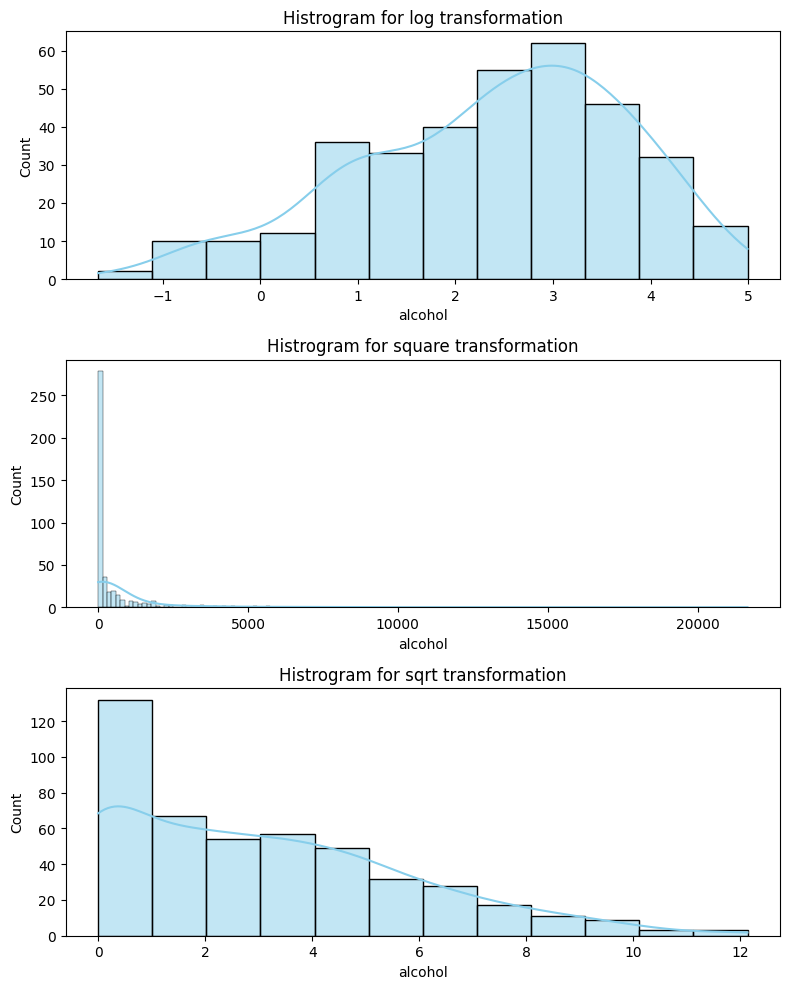

In [36]:
# List of transformations
transformations = ["log", "square", "sqrt"]

# Dictionary mapping transformation names to corresponding functions
transformation_functions = {
    "log": np.log,
    "square": np.square,
    "sqrt": np.sqrt
}

fig, axs = plt.subplots(3, 1, figsize=(8,10))

for i, transformation in enumerate(transformations):
    sns.histplot(transformation_functions[transformation](data_HA["alcohol"]), kde=True, color='skyblue', edgecolor='black', ax=axs[i])
    axs[i].set_title(f"Histrogram for {transformation} transformation")
plt.tight_layout()
plt.show()

c:\Users\sshres07\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


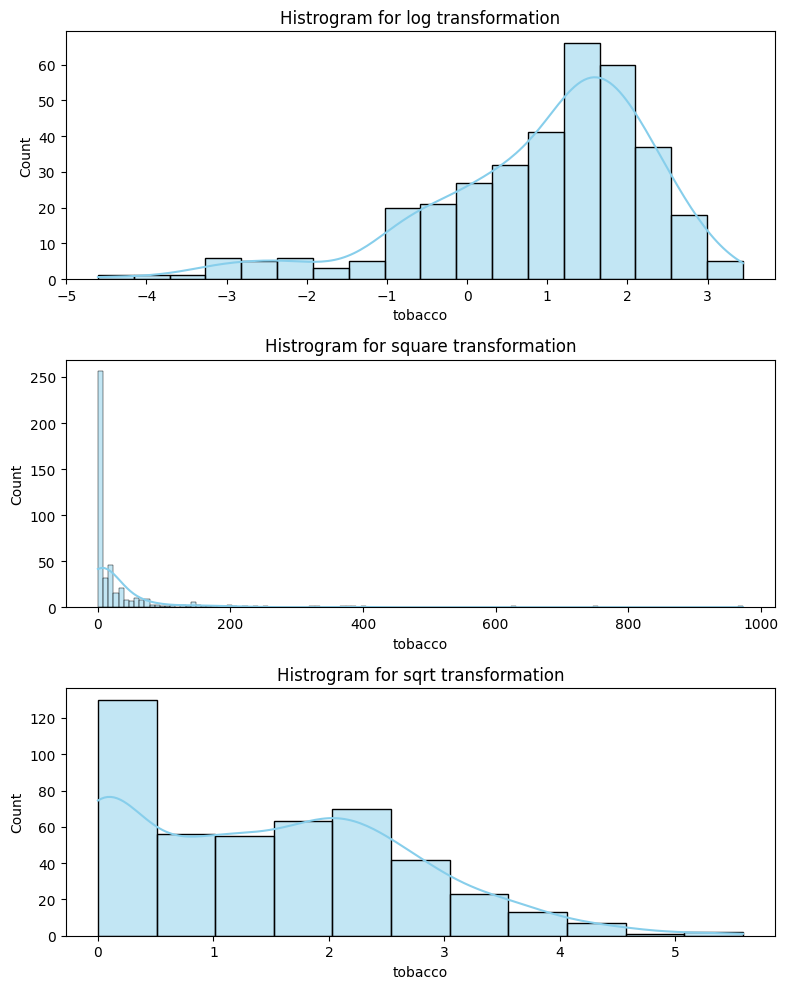

In [37]:
# List of transformations
transformations = ["log", "square", "sqrt"]

# Dictionary mapping transformation names to corresponding functions
transformation_functions = {
    "log": np.log,
    "square": np.square,
    "sqrt": np.sqrt
}

fig, axs = plt.subplots(3, 1, figsize=(8,10))

for i, transformation in enumerate(transformations):
    sns.histplot(transformation_functions[transformation](data_HA["tobacco"]), kde=True, color='skyblue', edgecolor='black', ax=axs[i])
    axs[i].set_title(f"Histrogram for {transformation} transformation")
plt.tight_layout()
plt.show()

In [ ]:
# List of transformations
transformations = ["log", "square", "sqrt"]

# Dictionary mapping transformation names to corresponding functions
transformation_functions = {
    "log": np.log,
    "square": np.square,
    "sqrt": np.sqrt
}

fig, axs = plt.subplots(3, 1, figsize=(8,10))

for i, transformation in enumerate(transformations):
    sns.histplot(transformation_functions[transformation](data_HA["alcohol"]), kde=True, color='skyblue', edgecolor='black', ax=axs[i])
    axs[i].set_title(f"Histrogram for {transformation} transformation")
plt.tight_layout()
plt.show()

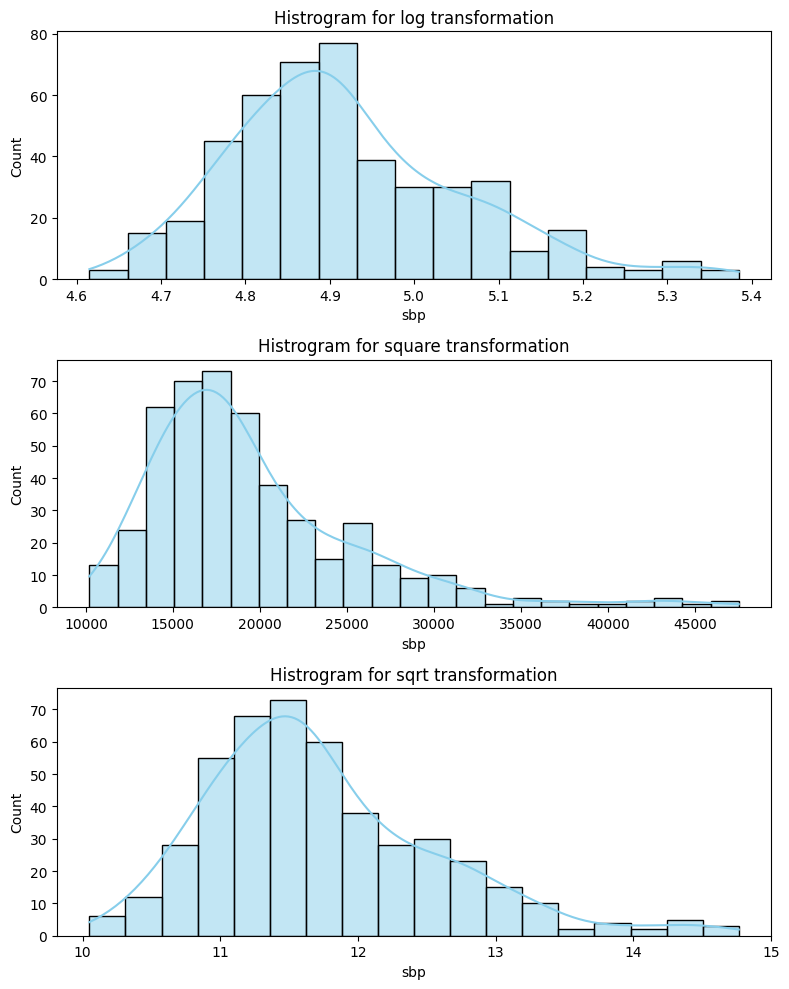

In [38]:
# List of transformations
transformations = ["log", "square", "sqrt"]

# Dictionary mapping transformation names to corresponding functions
transformation_functions = {
    "log": np.log,
    "square": np.square,
    "sqrt": np.sqrt
}

fig, axs = plt.subplots(3, 1, figsize=(8,10))

for i, transformation in enumerate(transformations):
    sns.histplot(transformation_functions[transformation](data_HA["sbp"]), kde=True, color='skyblue', edgecolor='black', ax=axs[i])
    axs[i].set_title(f"Histrogram for {transformation} transformation")
plt.tight_layout()
plt.show()

c:\Users\sshres07\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\sshres07\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


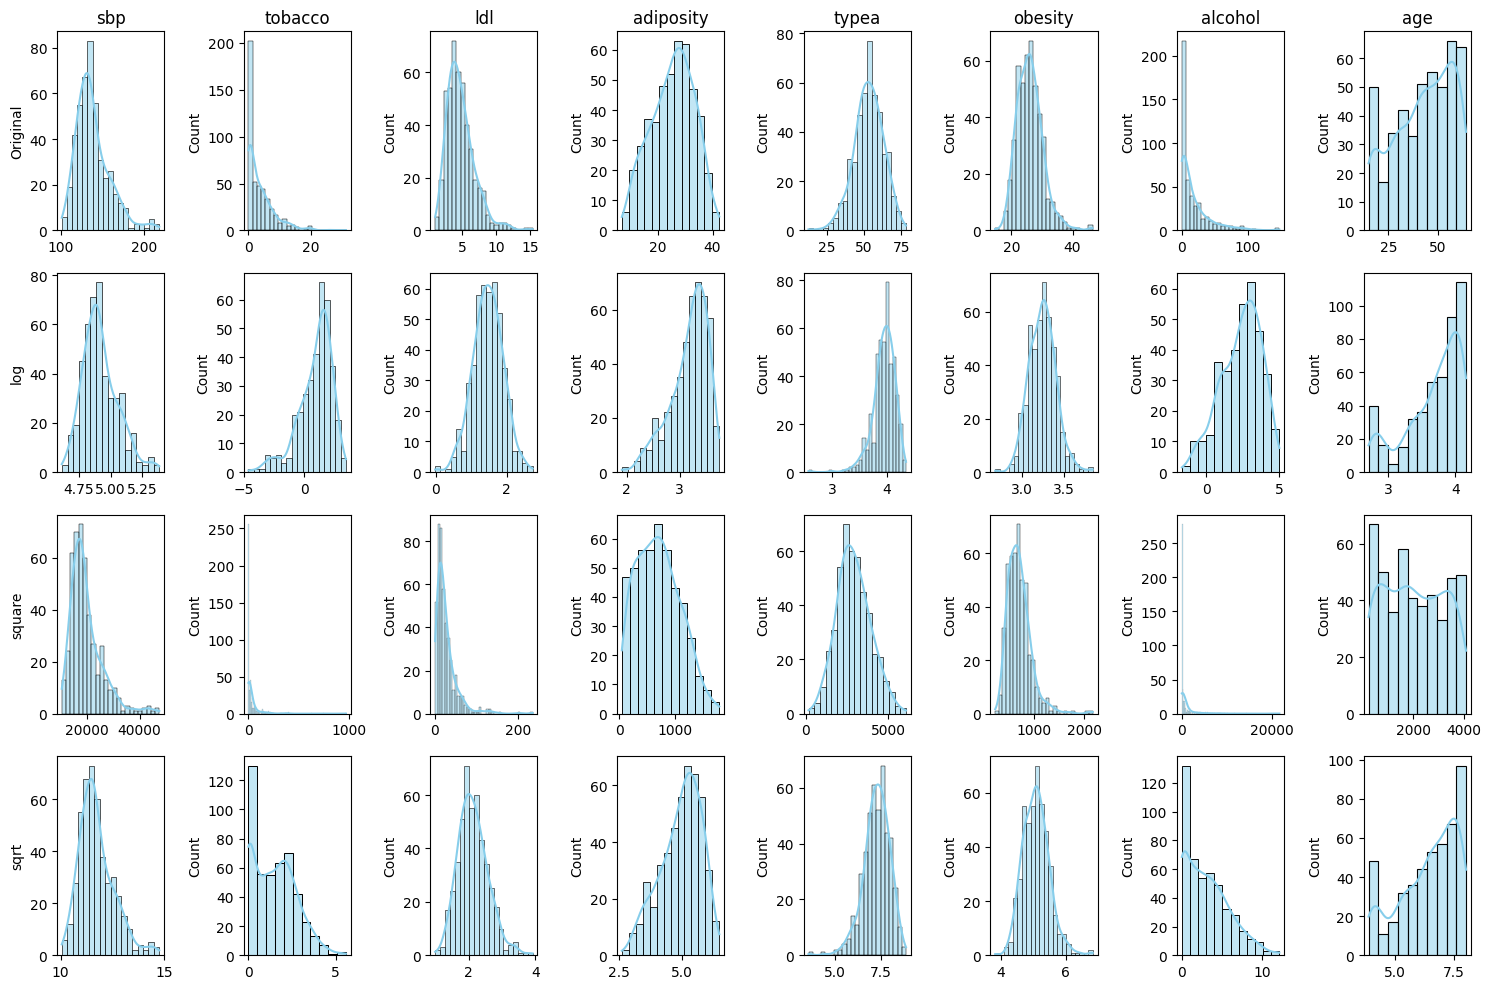

In [39]:
transformations = [None, "log", "square", "sqrt"]
list_var = ["sbp", "tobacco", "ldl", 'adiposity', "typea", "obesity", "alcohol", "age"]
# Create a figure and axis objects
fig, axs = plt.subplots(len(transformations), len(list_var), figsize=(15, 10))

# Iterate over rows (transformations)
for i, transformation in enumerate(transformations):
    # Iterate over columns (variables)
    for j, variable in enumerate(list_var):
        # Apply transformation if specified
        transformed_data = data_HA[variable].copy()
        if transformation == "log":
            transformed_data = np.log(transformed_data)
        elif transformation == "square":
            transformed_data = np.square(transformed_data)
        elif transformation == "sqrt":
            transformed_data = np.sqrt(transformed_data)
        
        # Plot histogram with KDE for transformed data
        sns.histplot(transformed_data, kde=True, ax=axs[i, j], color='skyblue', edgecolor='black')
        
        # Add title to the first row
        if i == 0:
            axs[i, j].set_title(f"{variable}")
        
        # Add transformation label to the leftmost column
        if j == 0:
            axs[i, j].set_ylabel(transformation if transformation else "Original")
        
        # Remove x-axis label for clarity
        axs[i, j].set_xlabel('')
        
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

now lets select the appropriate transformation and then scale. 
Lets use both min max scaling and standardiztion. 

create your own funciton to perform the min max scaling and standardization

for min max scaling to 0 to 1 the formula is 
scaled_value = (x - min(x))/(max(x)-min(x))

for standardization the formula is
standardized_value = (x - mean(x))/SD(x)
